---

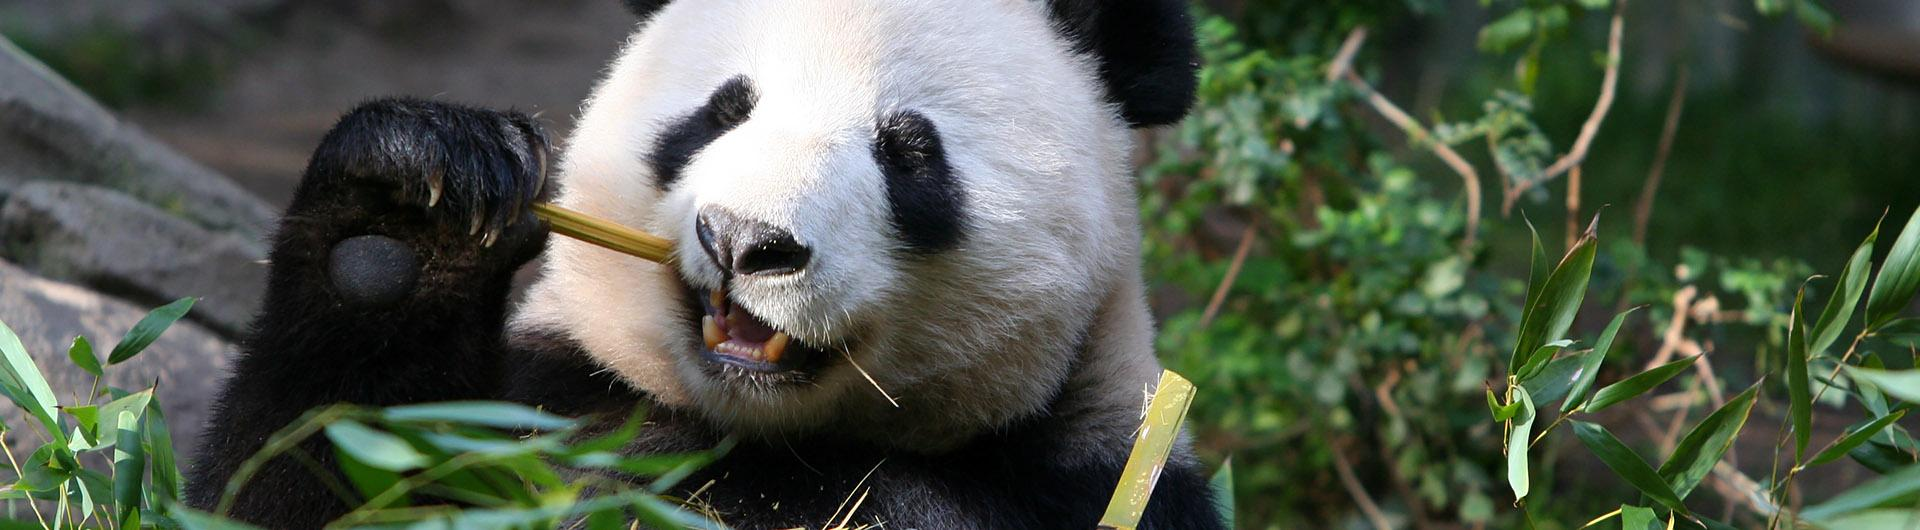

---

# Pandas Knowladge  
> 与前面类似的，学习pandas其实就在学习和使用别人的第三方包，因此本part主要讲解pandas其中的一些基础方法

1. pandas包内有如此多的内容，我们初学阶段，无需掌握所有（也掌握不完），仅需要了解与数据处理相关的基础内容即可

2. 还是一样的道理，学习这些基础知识，就如同学习excel上的各个选项按钮操作，这样你才能使用python去处理数据

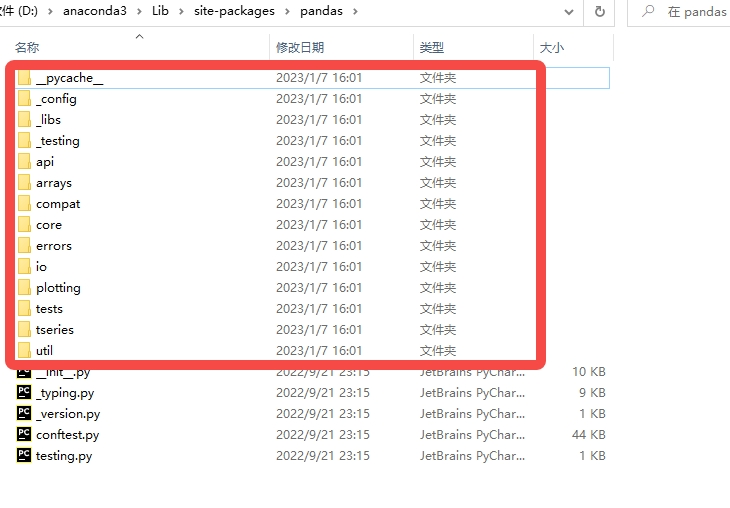

和我们导入自定义的包一样，第一步我们需要做的同样是

In [9]:
import pandas as pd

我们能够通过英文的句点，来调用包内的功能

In [29]:
pd.DataFrame()

""


In [10]:
pd.Series()

Series([], dtype: object)

---

## DataFrame与Series

> 这里，我们所谓的学习pandas，实际上主要是在学习DataFrame 或 Series的功能以及少部分利用pandas调用的功能。因此我们先来理解一下DataFrame和Series是什么
- `Series`，仅表现为单独的一列内容 或者 一行内容（图中蓝色部分）
- `DataFrame`，不仅可以表现为单独的一列/一行内容，还能表现为多列/行内容，或者是一整张表格  


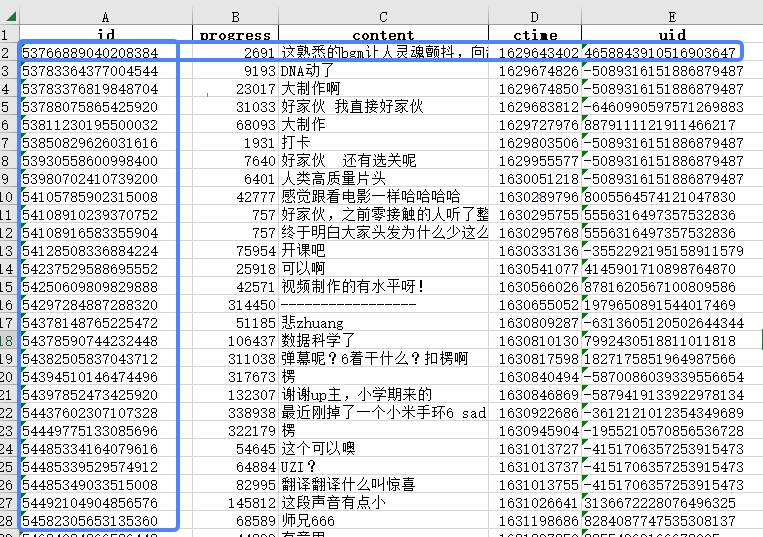

---

## 读取与导出数据？

### **本节内容需要理解的知识点**
1. 如何导入Pandas ： `import pandas as pd`
2. 通过read_* 、 to_* 能够读取、导出数据  
3. 通过info属性能够检查字段的类型  
4. 使用astype方法改变字段类型；使用converters改变字段类型

### read_

从每个数据源导入数据是由前缀为 read_* 的函数提供的。类似地，to_* 方法用于存储(导出)数据。


Pandas提供了read_excel、read_csv等读取数据的方法。当然还有read_json、read_sql，可以自行探索。

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel(r'1、系统认识数据分析.xlsx')
data

,id,progress,content,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4.658844e+18
1,53783364377004544,9193,DNA动了,1629674826,-5.089316e+18
2,53783376819848704,23017,大制作啊,1629674850,-5.089316e+18
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6.460991e+18
4,53811230195500032,68093,大制作,1629727976,8.879111e+18
...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3.205882e+18
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2.040097e+18
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4.435509e+18
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4.633711e+18


### info

使用info可以查看字段类型情况，以此确保你接下来对进行数据处理时，是否需要转换类型

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2126 non-null   int64  
 1   progress  2126 non-null   int64  
 2   content   2126 non-null   object 
 3   ctime     2126 non-null   int64  
 4   uid       2086 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 83.2+ KB


---

### converters 参数

在实际读取场景中，DataFrame容易将原本Excel中为文本数值的字段类型变为数值类型，我们可以使用DataFrame的dtype属性来查看各个字段的类型并更改

- 读取阶段就必须为某一类型时，使用convertes

In [5]:
data = pd.read_excel(r'1、系统认识数据分析.xlsx', converters={'uid': str})
data

,id,progress,content,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883
4,53811230195500032,68093,大制作,1629727976,8879111121911466217
...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3205881671998110354
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2040096988083157546
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4435509291488926332
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4633711017283044897


### to_

In [4]:
data.to_excel('test.xlsx')

### astype

- 导出时需要保证某些字段的类型如你所期望，使用astype

处理完数据并导出后，我们发现Id字段不应该是数值类型，因此在导出前需要使用astype转换一下类型

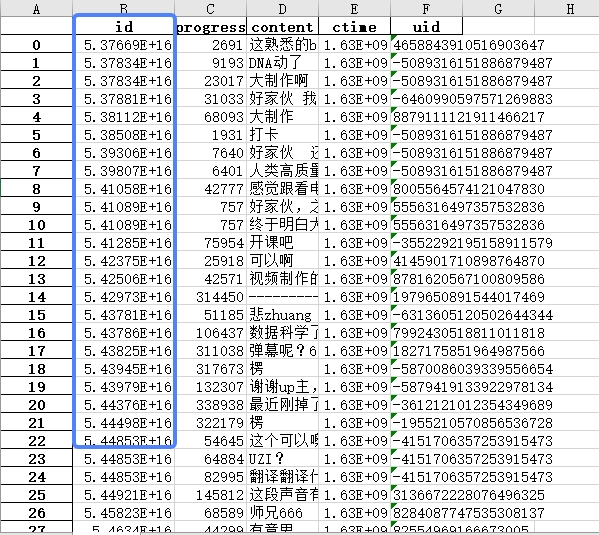

In [6]:
data['id'] = data['id'].astype(str)

---

## 筛选数据内容

### **本节内容需要理解的知识点**：  
1. 在DataFrame当中，`[]` 相当于sql中的select  
2. 通过iloc可以选取相应行的内容

### [ ]

在pandas中提供了选择、切片、条件筛选的方法，能让你简方便的获取你需要的数据内容


选择单列或多列，在DataFrame当中，`[]` 相当于sql中的select

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel(r'1、系统认识数据分析.xlsx')
data

,id,progress,content,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4.658844e+18
1,53783364377004544,9193,DNA动了,1629674826,-5.089316e+18
2,53783376819848704,23017,大制作啊,1629674850,-5.089316e+18
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6.460991e+18
4,53811230195500032,68093,大制作,1629727976,8.879111e+18
...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3.205882e+18
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2.040097e+18
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4.435509e+18
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4.633711e+18


类似SQL中的操作

In [3]:
'select id from data'

'select id from data'

In [4]:
data['id']

0         53766889040208384
1         53783364377004544
2         53783376819848704
3         53788075865425920
4         53811230195500032
               ...         
2121    1218810663133506304
2122    1220839829835662592
2123    1221739920041784064
2124    1221887180755147776
2125    1222310337660096000
Name: id, Length: 2126, dtype: int64

需要选择多列的时候，使用列表将列名框选起来

In [4]:
'select id, content from data'

'select id, content from data'

In [ ]:
data[['id', 'content']]

- 我们可以通过bool索引的方式筛选我们想要的行（比较运算符），对比beginner part1的if部分   
`[]`会返回判断为True的行目

In [5]:
# 判断 弹幕出现时间大于 19：45 （秒数：1185） 的行目
'where progress > 1185000'

'where progress > 1185000'

In [ ]:
data['progress'] > 1185000

In [6]:
# 选择出为true的行目
'select * from data where progress > 1185000'

'select * from data where progress > 1185000'

In [ ]:
data[data['progress'] > 1185000]

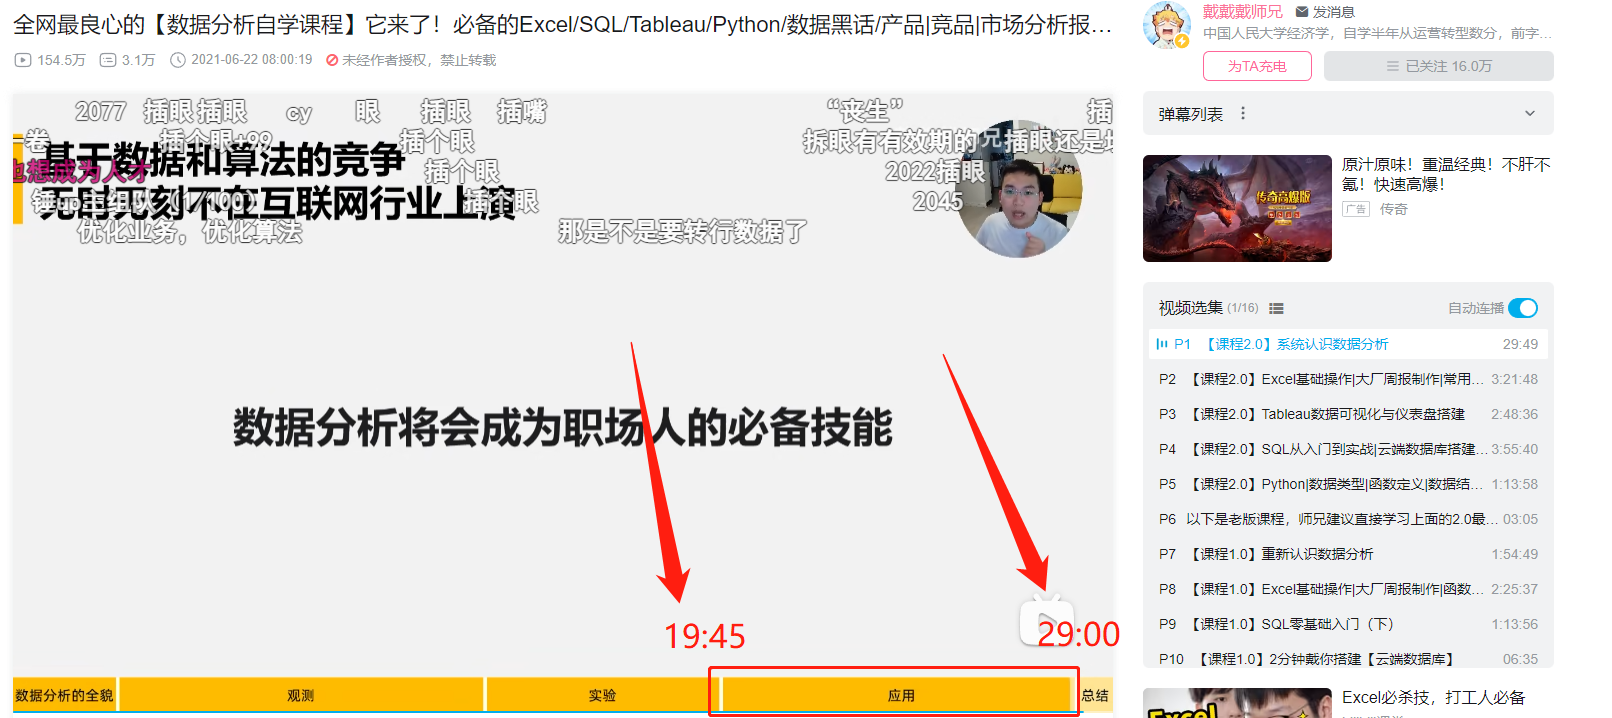

- 我们可以通过bool索引的方式筛选我们想要的行（与或非运算符）

In [14]:
# 19：45 ~ 29:00（即秒数 1185 ~ 1740）
"""select * from data
where progress > 1185000 and progress < 1740000"""

'select * from data\nwhere progress > 1185000 and progress < 1740000'

In [ ]:
data[(data['progress'] > 1185000) & (data['progress'] < 1740000)]

### iloc

- 使用iloc选择行目数 或 具体某个值，相当于limit

In [15]:
'select * from data limit 1'

'select * from data limit 1'

In [ ]:
data.iloc[0]

In [16]:
'select * from data limit 1284, 2125'

'select * from data limit 1284, 2125'

In [ ]:
data.iloc[1284:2125]

### for循环  
我们可以发现，基本上都是在使用数字（索引）来访问数据的内容，因此，我们可以利用for循环 帮助我们来做一些批量的操作（例如爬虫时，需要更新相关参数）

In [32]:
for i in range(len(data)):
    print(data['id'].iloc[i])

53766889040208384
53783364377004544
53783376819848704
53788075865425920
53811230195500032
53850829626031616
53930558600998400
53980702410739200
54105785902315008
54108910239370752
54108916583355904
54128508336884224
54237529588695552
54250609809829888
54297284887288320
54378148765225472
54378590744232448
54382505837043712
54394510146474496
54397852473425920
54437602307107328
54449775133085696
54485334164079616
54485339529574912
54485349033515008
54492104904856576
54582305653135360
54634034266536448
54651226149249536
54660380451644928
54802552072456192
54852662210021376
54854562366038016
54887891561638912
54908354327001088
54923117259869696
54923333679940096
55062738412749312
55062749658761216
55203650650537472
55258809521890304
55298405793053696
55308393613214720
55324507970785280
55374638469647872
55402427191655936
55555703953391104
55557457773662720
55559219520371712
55559231122465792
55564123408848896
55620099312743424
55849481008632320
55889941878839808
56040101526194688
5605939645

既然能够用上述方法访问，那同样的也能够用遍历元素的方式进行访问

In [33]:
for danmu_id in data['id']:
    print(danmu_id)

53766889040208384
53783364377004544
53783376819848704
53788075865425920
53811230195500032
53850829626031616
53930558600998400
53980702410739200
54105785902315008
54108910239370752
54108916583355904
54128508336884224
54237529588695552
54250609809829888
54297284887288320
54378148765225472
54378590744232448
54382505837043712
54394510146474496
54397852473425920
54437602307107328
54449775133085696
54485334164079616
54485339529574912
54485349033515008
54492104904856576
54582305653135360
54634034266536448
54651226149249536
54660380451644928
54802552072456192
54852662210021376
54854562366038016
54887891561638912
54908354327001088
54923117259869696
54923333679940096
55062738412749312
55062749658761216
55203650650537472
55258809521890304
55298405793053696
55308393613214720
55324507970785280
55374638469647872
55402427191655936
55555703953391104
55557457773662720
55559219520371712
55559231122465792
55564123408848896
55620099312743424
55849481008632320
55889941878839808
56040101526194688
5605939645

### 布尔索引

> 选择出一列数据进行条件的判断，最后再用一层[]来嵌套筛选出为true的行

### 数据去重

> 调用drop_duplicates()方法，并将需要去重的列作为参数传入

---

## 数据合并、连接
>Pandas用类似于SQL的连接、合并操作，可以横向、纵向拼接多份数据

### **本节内容需要理解的知识点**

- concat可以使用该函数按列和按行连接多个表。  
- 想要实现数据库的表合并/连接，使用merge 函数。

轴（axis）
- 当我们参数指定为axis=0的时候，效果作用于行，即行数会发生变化 或 效果自↑而↓  
- 当我们参数指定为axis=1的时候，效果作用于列，即列数会发生变化 或 效果自左往右

### 轴axis  
> 我们从作用的方向去理解即可  
- 当我们参数指定为axis=0的时候，效果自↑而↓，对每一列进行操作  
- 当我们参数指定为axis=1的时候，效果自左往右，对每一行进行操作

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([{'a':1, 'b':2, 'c':3},
                  {'a':4, 'b':5, 'c':6},
                  {'a':7, 'b':8, 'c':9}])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


 - 效果自↑而↓

In [6]:
df.sum(axis=0)

a    12
b    15
c    18
dtype: int64

- 效果自左往右

In [5]:
df.sum(axis=1)

0     6
1    15
2    24
dtype: int64

---

### 拼接

利用pd.concat来水平、竖直凭借DataFrame

In [11]:
import pandas as pd
p1 = pd.read_excel('1、系统认识数据分析.xlsx', converters={'id': str, 'uid': str})
p2 = pd.read_excel('2、EXCEL基础操作.xlsx', converters={'id':str ,'uid': str})

- 横向拼接，列数发生变化

In [12]:
pd.concat([p1, p2], axis=1)

,id,progress,content,ctime,uid,id,progress,content,ctime,uid
0,53766889040208384,2691.0,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1.629643e+09,4658843910516903647,53806112870839808,6260,第一条弹幕,1629718215,-5524725689125822280
1,53783364377004544,9193.0,DNA动了,1.629675e+09,-5089316151886879487,53806933426753536,10420,来了，棒,1629719780,NaN
2,53783376819848704,23017.0,大制作啊,1.629675e+09,-5089316151886879487,53807166301780480,31344,3个小时 1.0是2个小时,1629720225,4892315397097361368
3,53788075865425920,31033.0,好家伙 我直接好家伙,1.629684e+09,-6460990597571269883,53807435106465280,30510,第九条弹幕,1629720737,2377566476259591671
4,53811230195500032,68093.0,大制作,1.629728e+09,8879111121911466217,53811722117039616,6199,时长感人,1629728914,6716553225725719128
...,...,...,...,...,...,...,...,...,...,...
12543,NaN,NaN,NaN,NaN,NaN,1218217237174119424,12020175,5,1672314011,1659130488361527552
12544,NaN,NaN,NaN,NaN,NaN,1221471971259422976,12013829,完结撒花！！！谢谢师兄！！！,1672702005,-4939786866393650644
12545,NaN,NaN,NaN,NaN,NaN,1221472029442967808,12021000,5,1672702012,-4939786866393650644
12546,NaN,NaN,NaN,NaN,NaN,1221890371571986432,12010022,为自己鼓掌，为师兄鼓掌,1672751883,-6381986259600013454


- 纵向拼接，行数发生变化

In [84]:
pd.concat([p1, p2], axis=0)

,id,progress,content,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883
4,53811230195500032,68093,大制作,1629727976,8879111121911466217
...,...,...,...,...,...
12543,1218217237174119424,12020175,5,1672314011,1659130488361527552
12544,1221471971259422976,12013829,完结撒花！！！谢谢师兄！！！,1672702005,-4939786866393650644
12545,1221472029442967808,12021000,5,1672702012,-4939786866393650644
12546,1221890371571986432,12010022,为自己鼓掌，为师兄鼓掌,1672751883,-6381986259600013454


---

### 重置索引
> 一般纵向拼接之后，索引都会出现问题，需要采用reset_index()对索引进行重置

采用dataframe.reset_index()来重置索引

In [85]:
data_concat = pd.concat([p1, p2], axis=0)
data_concat

,id,progress,content,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883
4,53811230195500032,68093,大制作,1629727976,8879111121911466217
...,...,...,...,...,...
12543,1218217237174119424,12020175,5,1672314011,1659130488361527552
12544,1221471971259422976,12013829,完结撒花！！！谢谢师兄！！！,1672702005,-4939786866393650644
12545,1221472029442967808,12021000,5,1672702012,-4939786866393650644
12546,1221890371571986432,12010022,为自己鼓掌，为师兄鼓掌,1672751883,-6381986259600013454


**loc相较iloc的劣势**
> 很多人会喜欢使用 `loc[]` 或者 `[]` 来调取数据内容，如果没有重置索引的话，将会出现严重的问题  
> 而 `iloc[]` 不会受到 未重置索引 的影响

**区别！！**

> loc依据**索引标签**进行筛选   iloc依据**索引位置**进行筛选

In [86]:
data_concat.loc[100]

,id,progress,content,ctime,uid
100,59006634471676928,90596,这就是惊喜,1639637423,-3554811522575920624
100,59006654351667712,2553,第三天,1639637461,-3554811522575920624


In [87]:
data_concat.iloc[100]

id             59006634471676928
progress                   90596
content                    这就是惊喜
ctime                 1639637423
uid         -3554811522575920624
Name: 100, dtype: object

---

### 表连接  
> 该部分结合sql来理解即可

- 利用pd.merge()实现表连接

In [89]:
print("""
select * from p1
join p2
on p1.uid = p2.uid
""")
inner = pd.merge(left=p1, right=p2, how='inner', left_on='uid', right_on='uid')
inner


select * from p1
join p2
on p1.uid = p2.uid



,id_x,progress_x,content_x,ctime_x,uid,id_y,progress_y,content_y,ctime_y
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,54982927380083200,4137203,2,1631962811
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,53839423389023232,14565,良心课程，更新的真快,1629781750
2,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,53839449432893440,62416,这是我免费就能看的吗,1629781800
3,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,53930609517175296,4564,祖传开头,1629955674
4,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,53980592290950656,31439,画质飞升,1630051008
...,...,...,...,...,...,...,...,...,...
16568,1205237597551812608,1773864,亿点点简单,1670766717,-60609748605810248,1109603674264592128,6704657,不错了，我看了一周了，还没看完。。。。。,1659366265
16569,1205237597551812608,1773864,亿点点简单,1670766717,-60609748605810248,1212441262402297344,6981353,列号，哈哈哈哈哈，我在这儿学了几次翻了几次跟斗，excel这个跟我们日常的习惯反着来的,1671625461
16570,1205237597551812608,1773864,亿点点简单,1670766717,-60609748605810248,1110091775395495424,8096895,因为这里干货多，需要动脑子思考，思考会消耗巨大的能量，饿很正常,1659424451
16571,1205237597551812608,1773864,亿点点简单,1670766717,-60609748605810248,1111141590425951232,8363743,这个思维太牛逼了，甩我几条街,1659549599


---

## 增删列
> DataFrame增加列的方式与字典（dict）新增键值对的方式相同

在Pandas中，能够通过简单的一行、几行代码生成新的列或删除指定的列


### 创建新列
> 采用`[]` + 新列名即可 

In [39]:
data['数据来源'] = '1、系统认识数据分析'
data

,id,progress,content,ctime,uid,数据来源
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4.658844e+18,1、系统认识数据分析
1,53783364377004544,9193,DNA动了,1629674826,-5.089316e+18,1、系统认识数据分析
2,53783376819848704,23017,大制作啊,1629674850,-5.089316e+18,1、系统认识数据分析
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6.460991e+18,1、系统认识数据分析
4,53811230195500032,68093,大制作,1629727976,8.879111e+18,1、系统认识数据分析
...,...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3.205882e+18,1、系统认识数据分析
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2.040097e+18,1、系统认识数据分析
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4.435509e+18,1、系统认识数据分析
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4.633711e+18,1、系统认识数据分析


---

### 更改列名  
> 通过rename方法来给列改名 

In [40]:
data.rename(columns={'id': '弹幕id', 'content': '弹幕'}, inplace=True)
data

,弹幕id,progress,弹幕,ctime,uid,数据来源
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4.658844e+18,1、系统认识数据分析
1,53783364377004544,9193,DNA动了,1629674826,-5.089316e+18,1、系统认识数据分析
2,53783376819848704,23017,大制作啊,1629674850,-5.089316e+18,1、系统认识数据分析
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6.460991e+18,1、系统认识数据分析
4,53811230195500032,68093,大制作,1629727976,8.879111e+18,1、系统认识数据分析
...,...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3.205882e+18,1、系统认识数据分析
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2.040097e+18,1、系统认识数据分析
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4.435509e+18,1、系统认识数据分析
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4.633711e+18,1、系统认识数据分析


---

### 删除列

In [41]:
del data['数据来源']

In [42]:
data

,弹幕id,progress,弹幕,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4.658844e+18
1,53783364377004544,9193,DNA动了,1629674826,-5.089316e+18
2,53783376819848704,23017,大制作啊,1629674850,-5.089316e+18
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6.460991e+18
4,53811230195500032,68093,大制作,1629727976,8.879111e+18
...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3.205882e+18
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2.040097e+18
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4.435509e+18
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4.633711e+18


## 排序与聚合分组
> 同样的，该部分结合sql理解即可

### **本节内容需要理解的知识点** 

|函数|作用|参数|备注|
|:-:|:-:|:-|:-|
|sort_values|排序|by：用以指定参与排序的列，ascending默认为True<br>ascending：选择降序或正序|使用范例1：`data.sort_values('字段名', ascending=False)`<br>使用范例2：`data.sort_values(['字段名1', '字段名2'])`|
|groupby|聚合分组|by：用以指定参与排序的列|需要再指定哪种聚合函数|
|agg|指定多个不同的聚合函数||`groupby('维度').agg(['count', 'sum'])`：使用方式示例1<br>`groupby('维度').agg({'度量1':'sum', '度量2': 'count'})`：使用方式示例2<br>`groupby('维度').agg({'度量1':['count', 'sum'], '度量2': 'count'})`：使用方式示例3|
|transform|能达到SQL窗口函数作用的聚合计算||使用方式示例：`groupby('维度')['度量'].transform('sum')`|

### 自定义排序

In [12]:
data

,id,progress,content,ctime,uid
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883
4,53811230195500032,68093,大制作,1629727976,8879111121911466217
...,...,...,...,...,...
2121,1218810663133506304,1658114,礼貌提问，大古是啥..,1672384753,3205881671998110354
2122,1220839829835662592,1499315,农学实名观看,1672626648,-2040096988083157546
2123,1221739920041784064,1734608,留下一个爪印,1672733947,4435509291488926332
2124,1221887180755147776,1759777,扎实的第一步,1672751502,4633711017283044897


In [14]:
data.sort_values(by='uid')

,id,progress,content,ctime,uid
933,56531329726263808,831133,有什么证可以考？,1634916154,-1024376498162345291
954,57848773333896704,813094,43个人诶.都不睡觉的吗,1637428978,-104115490630205842
1947,1131096167019724032,1770159,5,1661928370,-1042261832109559167
1832,1065329384224822528,1592185,财务=1,1654088359,-1056918864130148948
575,59422358457521664,494197,额，这是0基础课程么？,1640430354,-1061156892496464153
...,...,...,...,...,...
1709,999879611859039232,1536559,谢谢你泰罗,1646286138,NaN
1751,1021695826524661760,1760107,职场人要时刻提升自己的核心竞争路,1648886833,NaN
1855,1086257688322523648,1485647,现在有多少人在看,1656583207,NaN
1856,1086258441384824576,1575461,我就想学习一下工具的使用，工具的使用要学到什么程度,1656583297,NaN


In [15]:
data.sort_values(by=['uid', 'ctime'], ascending=False)

,id,progress,content,ctime,uid
1775,1037572622520607744,1450164,94个人 有6个人退出了？,1650779495,978221441045400004
1135,1037569904611638784,1045114,别看弹幕了 认真学习！！！,1650779171,978221441045400004
1134,1037569749296684544,1021870,快学习！别溜号！,1650779152,978221441045400004
1133,1037569604097946112,1000265,真的在学习 不要溜号！！快点学习,1650779135,978221441045400004
1132,1037568690217939456,864082,100人在观看,1650779026,978221441045400004
...,...,...,...,...,...
510,56573570906116608,363558,所以到底要不要学,1634996723,NaN
925,55875549511310848,1050405,战术喝水x2,1633665352,NaN
1573,55851263280548352,1769878,亿点简单,1633619030,NaN
923,55850780016589312,1069801,好家伙，贯口都来了,1633618108,NaN


### 聚合分组

#### agg  
如果你有以下的需求，那么则需要用到agg函数  
- 有多个聚合函数的需求  
- 对不同的字段有不同的聚合需求

示例：有多个聚合函数的需求

In [62]:
#  简单生成一份dataframe示例
df = pd.DataFrame({'Animal': ['战鹰', '战鹰', '战鹰',
                              '捷豹', '捷豹', '捷豹'],
                   'Max Speed': [380, 370, 370, 240, 260, 260],
                  'Min Speed': [330, 340, 340, 120, 130, 130]})
df

,Animal,Max Speed,Min Speed
0,战鹰,380,330
1,战鹰,370,340
2,战鹰,370,340
3,捷豹,240,120
4,捷豹,260,130
5,捷豹,260,130


In [54]:
df.groupby('Animal').agg(['max', 'mean'])

Max Speed             Min Speed            
             max        mean       max        mean
Animal                                            
战鹰           380  373.333333       340  336.666667
捷豹           260  253.333333       130  126.666667

示例：对相同/不同的字段有不同的聚合需求

In [55]:
df.groupby('Animal').agg({'Max Speed': max, 'Min Speed': min})

,Max Speed,Min Speed
Animal,,
战鹰,380,330
捷豹,260,120


#### transform(窗口函数)

In [56]:
df.groupby('Animal')['Max Speed'].transform('mean')

0    373.333333
1    373.333333
2    373.333333
3    253.333333
4    253.333333
5    253.333333
Name: Max Speed, dtype: float64

In [57]:
df['最大速度的平均速度'] = df.groupby('Animal')['Max Speed'].transform('mean')
df

,Animal,Max Speed,Min Speed,最大速度的平均速度
0,战鹰,380,330,373.333333
1,战鹰,370,340,373.333333
2,战鹰,370,340,373.333333
3,捷豹,240,120,253.333333
4,捷豹,260,130,253.333333
5,捷豹,260,130,253.333333


#### rank  

average

In [1]:
import pandas as pd

data = pd.DataFrame({'dept': ['A', 'A', 'B', 'B', 'B'], 'salary': [100, 200, 300, 300, 400]})
data['row_number'] = data.groupby('dept')['salary'].rank(ascending=False, method='average')
data

,dept,salary,row_number
0,A,100,2.0
1,A,200,1.0
2,B,300,2.5
3,B,300,2.5
4,B,400,1.0


min

In [3]:
import pandas as pd

data = pd.DataFrame({'dept': ['A', 'A', 'B', 'B', 'B'], 'salary': [100, 200, 300, 300, 400]})
data['row_number'] = data.groupby('dept')['salary'].rank(ascending=False, method='min')
data

,dept,salary,row_number
0,A,100,2.0
1,A,200,1.0
2,B,300,2.0
3,B,300,2.0
4,B,400,1.0


max

In [4]:
import pandas as pd

data = pd.DataFrame({'dept': ['A', 'A', 'B', 'B', 'B'], 'salary': [100, 200, 300, 300, 400]})
data['row_number'] = data.groupby('dept')['salary'].rank(ascending=False, method='max')
data

,dept,salary,row_number
0,A,100,2.0
1,A,200,1.0
2,B,300,3.0
3,B,300,3.0
4,B,400,1.0


first

In [6]:
import pandas as pd

data = pd.DataFrame({'dept': ['A', 'A', 'B', 'B', 'B'], 'salary': [100, 200, 300, 300, 400]})
data['row_number'] = data.groupby('dept')['salary'].rank(ascending=False, method='first')
data

,dept,salary,row_number
0,A,100,2.0
1,A,200,1.0
2,B,300,2.0
3,B,300,3.0
4,B,400,1.0


dense

In [8]:
import pandas as pd

data = pd.DataFrame({'dept': ['A', 'A', 'B', 'B', 'B'], 'salary': [100, 200, 300, 300, 400]})
data['row_number'] = data.groupby('dept')['salary'].rank(ascending=False, method='dense')
data

,dept,salary,row_number
0,A,100,2.0
1,A,200,1.0
2,B,300,2.0
3,B,300,2.0
4,B,400,1.0


---

## 字符串方法

### **本节内容需要理解的知识点**

|知识点|作用|参数|
|:-:|:-:|:-:|
|series.str.split|类似于prep中的prep|参数expend=True，会得到一份由切分内容构成的DataFrame|
|series.str.replace|与我们通常接触到的replace功能相同||
|series.str.contains|判断Series中的每个值是否包含`关键字词`，若包含则返回True||

---

### split

- Series中的分列操作：str.split  
类似于prep的split

In [57]:
data['uid'].str.split('-', expand=True)

,0,1
0,4658843910516903647,None
1,,5089316151886879487
2,,5089316151886879487
3,,6460990597571269883
4,8879111121911466217,None
...,...,...
2121,3205881671998110354,None
2122,,2040096988083157546
2123,4435509291488926332,None
2124,4633711017283044897,None


### replace

- Series.str.replace

In [59]:
data['uid'].str.replace('-', '')

0       4658843910516903647
1       5089316151886879487
2       5089316151886879487
3       6460990597571269883
4       8879111121911466217
               ...         
2121    3205881671998110354
2122    2040096988083157546
2123    4435509291488926332
2124    4633711017283044897
2125    5175298829888224618
Name: uid, Length: 2126, dtype: object

### contains

- Series中提取相关内容操作：str.contains

In [62]:
data['content'].str.contains('哈')

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: content, Length: 2126, dtype: bool

In [63]:
data[data['content'].str.contains('哈')]

,id,progress,content,ctime,uid,cnt
8,54105785902315008,42777,感觉跟看电影一样哈哈哈哈,1630289796,8005564574121047830,1
98,59006605001601024,49045,哈哈哈哈哈有趣,1639637367,-3554811522575920624,1
160,981122608757145600,85750,花里胡哨哈哈哈,1644050129,2179501232625771388,1
219,1012281523619068928,74607,老唯物辩证法了哈哈,1647764561,-8085367891205113420,1
358,1103577264018308608,217992,哈哈哈哈哈数据运营又被内涵到,1658647861,3868919672851406368,1
...,...,...,...,...,...,...
1702,997931869595574272,1779834,哈哈这么简单吗？表示怀疑,1646053949,7513657275005654684,1
1785,1041457758509413888,1645309,哈哈哈哈哈哈,1651242639,478527706654617171,1
1844,1077291048264463104,1748904,哈哈哈哈哈哈哈哈丧生！！！！！,1655514300,-6242087167467298512,1
2048,1144908338035900160,1592078,哈哈哈哈,1663574909,1435400268036807066,1


## 绘图

### **本节内容需要理解的知识点**

Pandas中内置了作图方法，你能够依据数据来选择相应的绘图类型


In [2]:
live_data = [
        {'roomid': 'R8888',
         '直播时间': '2023-01-17',
         '直播间标题': '直播：⚡数据分析课程介绍⚡',
         'up主': '戴戴戴师兄',
         '曝光数': 14377,
         '进入数': 3960,
         '平均观看时长': 0.21},
        {'roomid': 'R8889',
         '直播时间': '2023-01-18',
         '直播间标题': '直播：⚡数据分析课程介绍⚡',
         'up主': '戴戴戴师兄',
         '曝光数': 8794,
         '进入数': 4366,
         '平均观看时长': 0.77},
        {'roomid': 'R8890',
         '直播时间': '2023-01-19',
         '直播间标题': '直播：⚡数据分析课程介绍⚡',
         'up主': '戴戴戴师兄',
         '曝光数': 10674,
         '进入数': 4611,
         '平均观看时长': 0.72},
        {'roomid': 'R8891',
         '直播时间': '2023-01-20',
         '直播间标题': '直播：⚡数据分析课程介绍⚡',
         'up主': '戴戴戴师兄',
         '曝光数': 11237,
         '进入数': 4492,
         '平均观看时长': 0.08},
        {'roomid': 'R8892',
         '直播时间': '2023-01-21',
         '直播间标题': '直播：⚡数据分析课程介绍⚡',
         'up主': '戴戴戴师兄',
         '曝光数': 10060,
         '进入数': 5117,
         '平均观看时长': 0.34},
        {'roomid': 'R8893',
         '直播时间': '2023-01-22',
         '直播间标题': '直播：⚡数据分析课程介绍⚡',
         'up主': '戴戴戴师兄',
         '曝光数': 10458,
         '进入数': 5042,
         '平均观看时长': 0.36}]
live_data = pd.DataFrame(live_data)
live_data

,roomid,直播时间,直播间标题,up主,曝光数,进入数,平均观看时长
0,R8888,2023-01-17,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,14377,3960,0.21
1,R8889,2023-01-18,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,8794,4366,0.77
2,R8890,2023-01-19,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,10674,4611,0.72
3,R8891,2023-01-20,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,11237,4492,0.08
4,R8892,2023-01-21,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,10060,5117,0.34
5,R8893,2023-01-22,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,10458,5042,0.36


### 折线图

<AxesSubplot:>

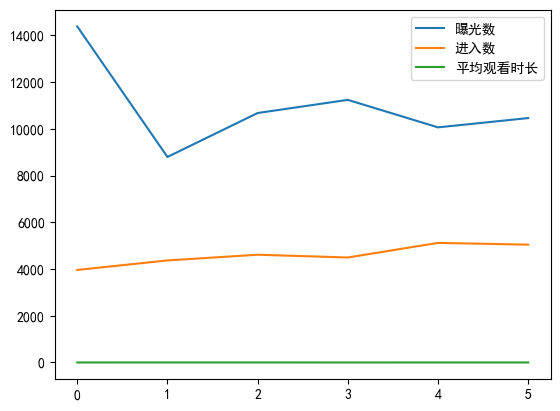

In [16]:
#  默认为折线图，其中X轴为表格的index，Y为我们所有的度量类型字段
live_data.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

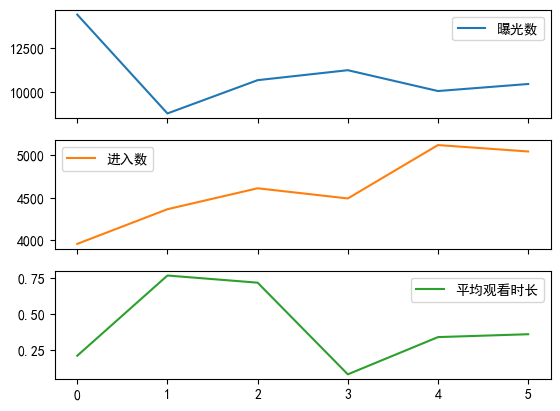

In [15]:
#  添加subplots参数，可以将各个度量分开
live_data.plot(subplots=True)

### 中文乱码解决问题

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

### 散点图  
alpha为点的透明度，越小越透明

<AxesSubplot:xlabel='曝光数', ylabel='进入数'>

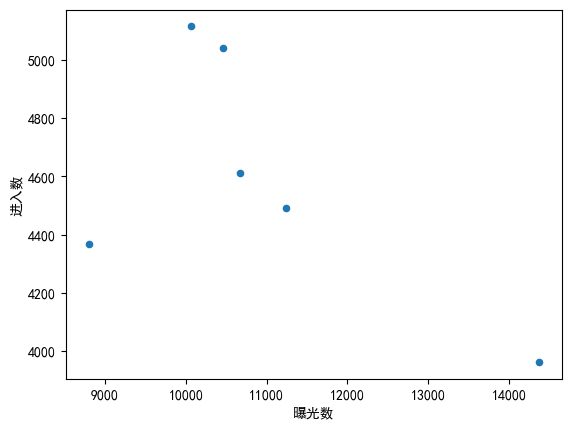

In [18]:
live_data.plot.scatter(x='曝光数', y='进入数', alpha=1)

### 条形图  
维度作x，度量作y

<AxesSubplot:xlabel='roomid'>

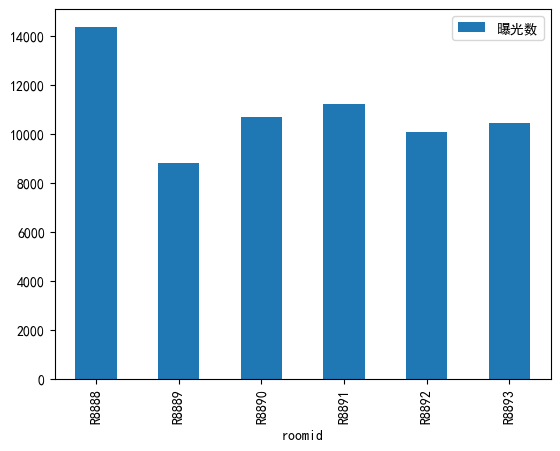

In [21]:
live_data.plot.bar(x='roomid', y='曝光数')

横向条形图

<AxesSubplot:ylabel='roomid'>

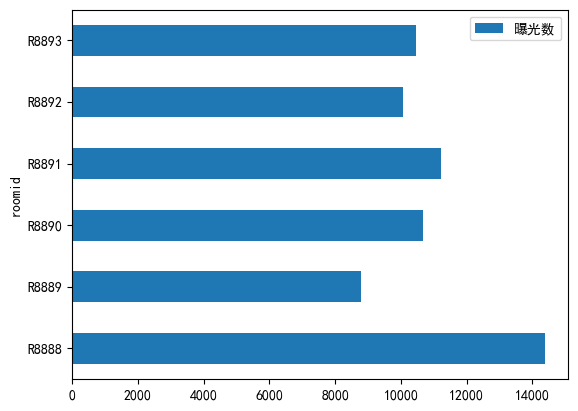

In [22]:
live_data.plot.barh(x='roomid', y='曝光数')

### 饼图  

In [23]:
live_data_pie = live_data.set_index('roomid')
live_data_pie

,直播时间,直播间标题,up主,曝光数,进入数,平均观看时长
roomid,,,,,,
R8888,2023-01-17,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,14377,3960,0.21
R8889,2023-01-18,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,8794,4366,0.77
R8890,2023-01-19,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,10674,4611,0.72
R8891,2023-01-20,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,11237,4492,0.08
R8892,2023-01-21,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,10060,5117,0.34
R8893,2023-01-22,直播：⚡数据分析课程介绍⚡,戴戴戴师兄,10458,5042,0.36


<AxesSubplot:ylabel='曝光数'>

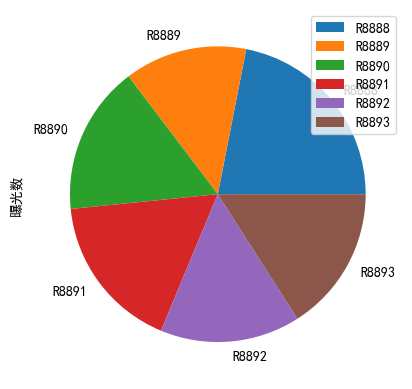

In [26]:
live_data_pie.plot.pie(y='曝光数')

In [14]:
import pygwalker as pyg

In [ ]:
pyg.walk()

---

## map、apply、applymap  
>map、apply是非常常用的两个方法，淇参数理解起来会相对晦涩

### **本节内容需要理解的知识点**

|知识点|作用|
|:-:|:-:|
|lambda|1.定义一些简单的函数<br>2.能够很好的搭配map一同食用|
|map|能够套用任意处理数据的函数|

### 匿名函数 lambda 
- 当你想要定义的函数功能简单时，可以直接使用 `lambda` 表达式
- `lambda`表达式格式如下

$$lambda\quad参数: 表达式$$

In [75]:
def add(a):
    return a + 5
add(5)

10

In [76]:
func = lambda x: x + 5
func(5)

10

### map✨  
- 在padnas中，Series类型才能使用map函数  
- 使用map函数时，传入参数可以是函数 或者是 字典

In [2]:
#  简单生成一份dataframe示例
import pandas as pd
df = pd.DataFrame({'Animal': ['战鹰', '战鹰', '战鹰',
                              '捷豹', '捷豹', '捷豹'],
                   'Max Speed': [380, 370, 370, 240, 260, 260],
                  'Min Speed': [330, 340, 340, 120, 130, 130]})
df

,Animal,Max Speed,Min Speed
0,战鹰,380,330
1,战鹰,370,340
2,战鹰,370,340
3,捷豹,240,120
4,捷豹,260,130
5,捷豹,260,130


- 传入字典

In [80]:
df['中文名'] = df['Animal'].map({'战鹰': 'eagle', '捷豹': 'cat'})
df

,Animal,Max Speed,Min Speed,中文名
0,战鹰,380,330,eagle
1,战鹰,370,340,eagle
2,战鹰,370,340,eagle
3,捷豹,240,120,cat
4,捷豹,260,130,cat
5,捷豹,260,130,cat


- 传入匿名函数

In [81]:
df['【匿名】Max Speed'] = df['Max Speed'].map(lambda x: x+5)
df

,Animal,Max Speed,Min Speed,中文名,【匿名】Max Speed
0,战鹰,380,330,eagle,385
1,战鹰,370,340,eagle,375
2,战鹰,370,340,eagle,375
3,捷豹,240,120,cat,245
4,捷豹,260,130,cat,265
5,捷豹,260,130,cat,265


- 传入函数

In [82]:
df['【函数】Max Speed'] = df['Max Speed'].map(add)
df

,Animal,Max Speed,Min Speed,中文名,【匿名】Max Speed,【函数】Max Speed
0,战鹰,380,330,eagle,385,385
1,战鹰,370,340,eagle,375,375
2,战鹰,370,340,eagle,375,375
3,捷豹,240,120,cat,245,245
4,捷豹,260,130,cat,265,265
5,捷豹,260,130,cat,265,265


---

### apply
- 在pandas中，Series、DataFrame类型都可以使用apply函数
- 当你需要对多个不同的列，进行不同的操作时，可以使用

- 将animal字段转换为英文；将所有数值字段都 + 10

In [137]:
def func(series):
    if series.name == 'Animal':
        parse = series.map({'战鹰': 'eagle', '捷豹': 'cat'})
        return parse
    elif (series.name == 'Max Speed') or (series.name == 'Min Speed'):
        parse = series + 10
        return parse

In [127]:
df

,Animal,Max Speed,Min Speed
0,战鹰,380,330
1,战鹰,370,340
2,战鹰,370,340
3,捷豹,240,120
4,捷豹,260,130
5,捷豹,260,130


In [138]:
df.apply(func)

,Animal,Max Speed,Min Speed
0,eagle,390,340
1,eagle,380,350
2,eagle,380,350
3,cat,250,130
4,cat,270,140
5,cat,270,140


### applymap  
- 在pandas中，DataFrame类型才能使用applymap

- 将所有的值都转换为字符串类型

In [139]:
def to_str(values):
    return str(values)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Animal     6 non-null      object
 1   Max Speed  6 non-null      int64 
 2   Min Speed  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


In [ ]:
df = df.applymap(lambda )

In [143]:
df = df.applymap(to_str)
df

,Animal,Max Speed,Min Speed
0,战鹰,380,330
1,战鹰,370,340
2,战鹰,370,340
3,捷豹,240,120
4,捷豹,260,130
5,捷豹,260,130


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Animal     6 non-null      object
 1   Max Speed  6 non-null      object
 2   Min Speed  6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes
